# AlgoBOWL Submission Demo

Authors:
1. Hanna Barringer
1. Saad Elbeleidy
1. Austin Leo

This notebook is a demo of how our AlgoBOWL submission works.

The problem is as follows:

1. Given `n` points with `x,y,z` coordinates, group them into `k` clusters. 
1. All points have integer values for their coordinates between `-1000` and `1000`
1. `k` is between 2 and 20

For our submission we must create:
1. a difficult set of points for other teams to solve
1. solutions to all the other teams' submissions

We will begin by explaining our set up of the problem and our solution methodology then discuss how we developed our difficult problem for other teams to solve.

In [1]:
# First, we import the generator and file interaction files in order to generate a demo sample and read from it
from generator import *
from readwrite import *
%matplotlib inline

Let's generate a random demo sample file, then get the input values from it.

In [2]:
genSample("demoSample.txt")
demoN, demoK, demoPoints = getValsFromTxt("demoSample.txt")
print("We have {} points and {} sets to place them in.".format(demoN, demoK))

We have 334 points and 7 sets to place them in.


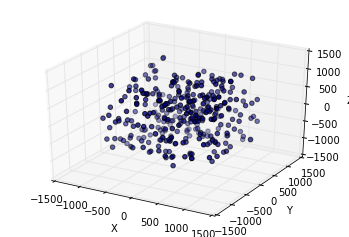

In [3]:
from plotter import *
plotSolutionSet(demoPoints)

## Finding the best solution

Our solution runs multiple algorithms that are suited for various cases, compares them and then returns the best result. We will now cover the various algorithms that we used.

In [ ]:
# We begin by importing our solver functions
from solver import *

### Random Algorithms

One of our algorithms randomly selects equally split sets of points into clusters and returns the best random selection. This proved to be ineffective with larger datasets but actually solved smaller data sets decently. Here it is applied to the demo sample:

Random selection algorithm score: 4594


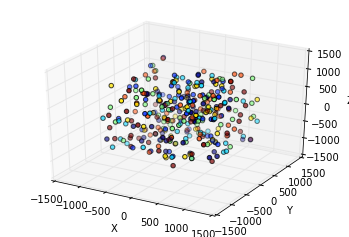

In [12]:
# Code may take a while to run
demoScore, demoSet = useAlgorithm(randomAlg, demoN, demoK, demoPoints, 1000)
print("Random selection algorithm score: {}".format(demoScore))
plotSolutionSet(demoPoints, demoSet)

A better algorithm randomly selects starting points and then applies a nearest neightbour algorithm to determine the points that should belong in that cluster. Below is an example of it applied to the demo dataset. Each color denotes a grouped set:

Random starting point algorithm score: 2903


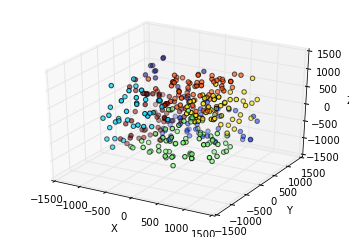

In [13]:
# Code may take a while to run
demoScore, demoSet = useAlgorithm(randomStartingPointAlgorithm, demoN, demoK, demoPoints, 100)
print("Random starting point algorithm score: {}".format(demoScore))
plotSolutionSet(demoPoints, demoSet)

### Iterator Algorithms

Randomly selecting starting points and applying nearest neighbour can provide a good result but each iteration starts from scratch. A better approach is to use the results of each iteration to calculate the next result. This results in two components to each algorithm:

1. Selecting the starting points
1. Selecting a calculation to iterate on

#### Selecting Starting Points

For selecting the starting points, we used three methods:

1. Randomly selecting starting points
1. Identified potential "Good" points that may split the volume into equal portions
    1. Selected the first k points of those (ordered in a way to split the volume close to k equal portions)
    1. Randomly selected k points of those to potentially select useful starting points
    
#### Iterative Calculations

For selecting a method to iterate on, we used two methods:

1. Mean - calculating the average x,y,z coordinate of all the points leading to a weighted center
1. Approximate Geometric Center - calculating the midpoint of x,y,z coordinates of min and max points on each axis

We can then combine a starting point selection with an iterative calculation and use that algorithm. Below is an example of using the geometric center with the random starting point algorithm.

Random starting point algorithm with geometric center iteration score: 2495


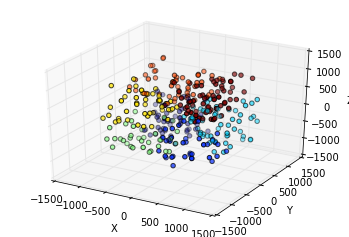

In [16]:
demoScore = 100000
demoSets = []
# Code may take a while to run
for i in range(50):
    iterativeRandomScore, iterativeRandomSets = iterateAlgorithm(demoN, demoK, demoPoints, selectRandomStartingCoords(demoPoints, demoK), findGeometricCenter, 100)
    if iterativeRandomScore < demoScore:
        demoScore = iterativeRandomScore
        demoSets = iterativeRandomSets
print("Random starting point algorithm with geometric center iteration score: {}".format(demoScore))
plotSolutionSet(demoPoints, demoSets)

### All in one solver

We then created an all in one solver for a specific dataset that applied all the algorithm combinations.

General Random took 9.358158000000003 seconds
NN Random Start took 14.186873999999989 seconds
Iterative Random Start - Geometric Center took 63.83129699999995 seconds
Iterative Good Start - Geometric Center took 1.2776900000000069 seconds
Iterative Random Good Start - Geometric Center took 12.614904000000024 seconds
Iterative Random Start - Mean took 63.312275 seconds
Iterative Good Start - Mean took 1.225035000000048 seconds
Iterative Random Good Start - Mean took 12.506305999999995 seconds
The winning algorithm was Iterative Random Start - Mean with a score of: 2417


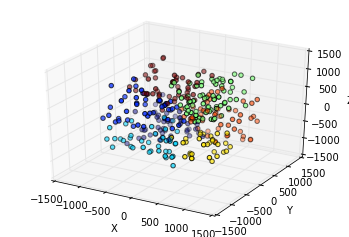

In [29]:
# Code will take a while to run
demoScore, demoSet, winner = solve(demoN, demoK, demoPoints)
print("The winning algorithm was {} with a score of: {}".format(winner, demoScore))
plotSolutionSet(demoPoints, demoSet)

## Creating A Difficult Problem To Solve

In order to create a difficult problem for others to solve, we developed a set of 999 points with 15 identifiable clusters. The points are grouped in 8 clear clusters as well as seven difficult to find clusters.

The 8 clear clusters are points around the extremes of some axes.

The 7 difficult clusters are clusters of 2 points each around the middle region of some axes.

Below is a plot of the difficult point set:

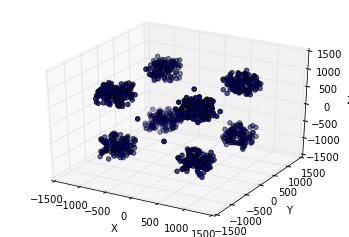

In [31]:
genToughSample("toughDemoSample.txt")
toughN, toughK, toughPoints = getValsFromTxt("toughDemoSample.txt")
plotSolutionSet(toughPoints)

Using our combined algorithms we can solve this problem as shown below:

General Random took 39.20983699999988 seconds
NN Random Start took 68.09314300000005 seconds
Iterative Random Start - Geometric Center took 363.83610999999996 seconds
Iterative Good Start - Geometric Center took 8.19045600000004 seconds
Iterative Random Good Start - Geometric Center took 82.01334599999996 seconds
Iterative Random Start - Mean took 337.7915909999999 seconds
Iterative Good Start - Mean took 8.000890000000027 seconds
Iterative Random Good Start - Mean took 83.2938160000001 seconds
The winning algorithm was Iterative Random Start - Geometric Center with a score of: 1314


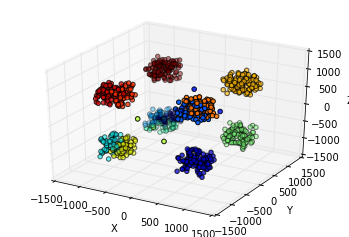

In [32]:
# Code will take a while to run
toughScore, toughSet, winner = solve(toughN, toughK, toughPoints)
print("The winning algorithm was {} with a score of: {}".format(winner, toughScore))
plotSolutionSet(toughPoints, toughSet)

## Group Plotter Function

Being able to plot various groups' datasets was useful in understanding how different groups tried to trick our solver. It also helped to see if our solver gave what seemed like a good enough solution. 

Here are some of our solutions to other groups' inputs with interesting problem points:

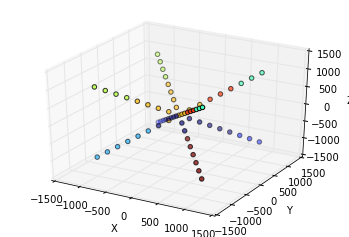

In [24]:
plotGroup(10)

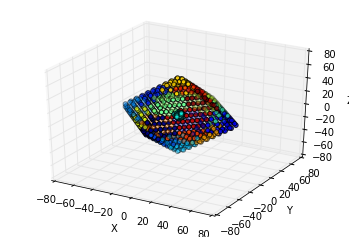

In [33]:
plotGroup(5)

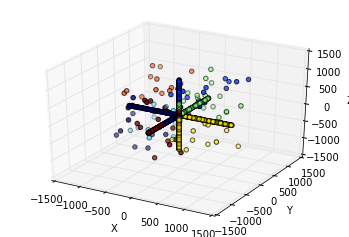

In [34]:
plotGroup(16)

## Results

The following are our results in the competition.

### Solver

In the competition it was able to come in at 4th place out of 22 groups. 

It got the following ranks, n times:

| Rank   |      n Times     |
|----------|:-------------:
| 1 | 8 |
| 2 | 4 |
| 3 | 1 |
| 4 | 5 |
| 5 | 2 |
| 6 | 0 |
| 7 | 2 |

This means that compared to the other groups, it acheived the best result 8 times, 2nd best 4 times and so on.

In conculsion, our solver offers a basic starting point for solving a clustering problem with k clusters. 

### Tough Sample

Our sample problem resulted in a difficult problem for other groups. 22 groups generated 17 distinct solutions for the problem. This is an indication that the problem presented a challenge for the other groups.